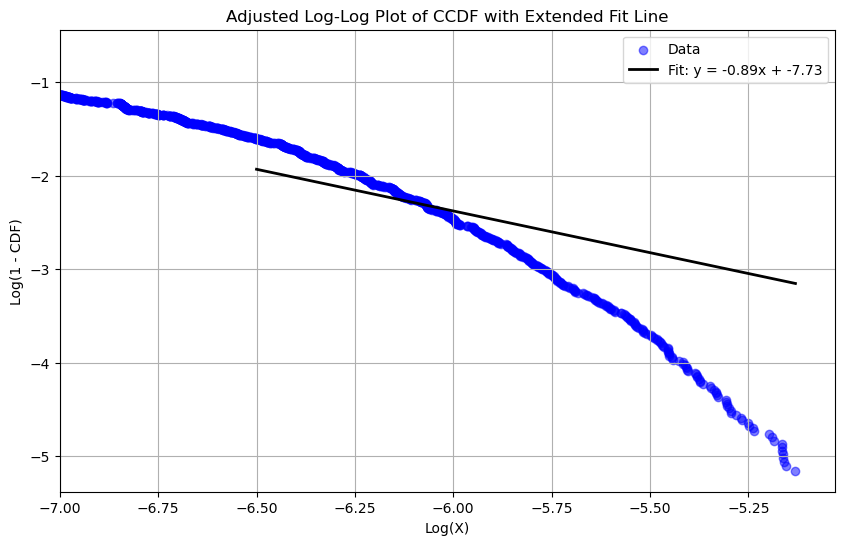

(-0.8924538459285113, -7.732583602567338)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/stock_prices (1).csv'
data = pd.read_csv(file_path)
log_returns = data['LogReturn'].values
sorted_log_returns = np.sort(log_returns)
cdf = np.arange(1, len(sorted_log_returns) + 1) / len(sorted_log_returns)
ccdf = 1 - cdf
positive_indices = (sorted_log_returns > 0) & (ccdf > 0)
filtered_log_returns = sorted_log_returns[positive_indices]
filtered_ccdf = ccdf[positive_indices]

percentile_1 = np.percentile(filtered_log_returns, 1)
percentile_99 = np.percentile(filtered_log_returns, 99)
restricted_indices = (filtered_log_returns > percentile_1) & (filtered_log_returns < percentile_99)
restricted_log_returns = filtered_log_returns[restricted_indices]
restricted_ccdf = filtered_ccdf[restricted_indices]

log_restricted_returns = np.log(restricted_log_returns)
log_restricted_ccdf = np.log(restricted_ccdf)
slope, intercept = np.polyfit(log_restricted_returns, log_restricted_ccdf, 1)
x_range = np.linspace(-6.5, max(log_restricted_returns), 100)
fitted_line = slope * x_range + intercept

plt.figure(figsize=(10, 6))
plt.scatter(log_restricted_returns, log_restricted_ccdf, color='blue', alpha=0.5, label='Data')
plt.plot(x_range, fitted_line, 'k-', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}', linewidth=2)
plt.xlabel('Log(X)')
plt.ylabel('Log(1 - CDF)')
plt.legend()
plt.title('Adjusted Log-Log Plot of CCDF with Extended Fit Line')
plt.grid(True)
plt.xlim(-7, max(log_restricted_returns) + 0.1)  
plt.show()

slope, intercept
